<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/actuaria/metodos_numericos/metodos_numericos_2p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2do Parcial

## Solución de sistemas lineales 

- Metodos: 
   - fijos : G.J pivoteo, MI pivoteo, LV, chalesky
   - Iterativos : Gauss- Seidel, Jacobi 
   

In [ ]:
import numpy as np 

# A = np.array([[2,3,-1],
            # [-4, 5, 0]], float)

# A[0,:] = A[0,:] / A[0,0]



# A[1,:] = A[1,:] - A[1,0]*A[0,:]


# temp = np.copy(A[0,:])
# A[0,:] = A[1,:]
# A[1,:] = temp 


# B = np.array([[2,3, 1]], float)# renglon
b = np.array([[2],[3]], float) # columnas 

# av = np.concatenate((A,b), axis =1 )  #concatenar filas

# print(av.shape)

A = np.array([[2,3,5,-4], [-3,2,-7,0], [9,-4,6,-1], [-8,1,-1,5]], float)
B = np.array([[7],[-9],[6],[8]], float)


[filas,columnas] = A.shape
renglones = len(B)
if filas == columnas and filas == renglones:
  au = np.concatenate((A,B), axis = 1)
 
  for j in range(0,columnas):
    renglon = j  # primer pivote 
    for i in range(j,renglones):
      if abs(au[renglon,j]) < abs(au[i,j]):
        renglon+=1
    temp = np.copy(au[j,:])
    au[j,:] = au[renglon,:]
    au[renglon,:] = temp
    au[j,: ]= au[j,:] / au[j,j]    # dividir el pivote en 1
              
  
    for i in range(0,filas):
      if i != j:
        au[i,:] = au[i,:] - au[i,j]* au[j,:]
# Extraemos la solución del sistema de ec.
x= au[:,4]  
# print(x)


array([[ 7.],
       [-9.],
       [ 6.],
       [ 8.]])

$ AX = b  $

$  B(Ax) = Bb  $

$  (BA)x  = Bb  $

$  Ix = Bb$

$ x = Bb$

$ A^{-1} $  <-- Matriz de inversa de A

$  x = A^{-1}b  $




In [ ]:
A = np.array([[2,3,5,-4], [-3,2,-7,0], [9,-4,6,-1], [-8,1,-1,5]], float)
B = np.array([[7],[-9],[6],[8]], float)

I = np.identity(4) # matriz identidas

[filas,columnas] = A.shape
renglones = len(B)
if filas == columnas and filas == renglones:
  au = np.concatenate((A,I), axis = 1)
 
  for j in range(0,columnas):
    renglon = j  # primer pivote 
    for i in range(j,renglones):
      if abs(au[renglon,j]) < abs(au[i,j]):
        renglon+=1
    temp = np.copy(au[j,:])
    au[j,:] = au[renglon,:]
    au[renglon,:] = temp
    au[j,: ]= au[j,:] / au[j,j]    # dividir el pivote en 1
              
  
    for i in range(0,filas):
      if i != j:
        au[i,:] = au[i,:] - au[i,j]* au[j,:]
au[3,4-7]

0.5974683544303797

# Metodo de crout 

## Descomposición LU
 - Ax = b 
 - (LU)x = b
 - L(Ux) = b:
    - Asi: 
       - L<b>y</b> = b 
       - Ux  = <b>y</b>

## Metodo 

L  = \begin{bmatrix}
l_{11} & 0 & 0 & . & . & .& 0\\
l_{21} & l_{22} & 0 & . & . & .& 0\\
. & . & . &  & . & & .\\
. & . & . &  &  & .& .\\
l_{n1} & l_{n2} & l_{n3} & . & . & .& l_{nn}\\
\end{bmatrix}


U  = \begin{bmatrix}
1 & u_{12} & u_{13} & . & . & .& u_{1n}\\
0 & 1 & u_{23} & u_{24} & . & .& u_{2n}\\
. & . & . & 1 & u_{35} & .& u_{3n}\\
. & . & . &  &  & .& .\\
0 & 0 & 0 & . & . & .& 1\\
\end{bmatrix}


A  = \begin{bmatrix}
a_{00} & a_{01}  & a_{02}  & . & . & .& a_{0,n-1} \\
a_{10} & a_{11} & a_{12} & a_{13} & . & .& a_{1,n-1} \\
a_{20} & a_{21} & a_{22} & a_{23} & a_{24} &. & a_{2,n-1} \\
. & . & . & . &  & & .\\
. & . & . &  & . & & .\\
a_{n-1,0} & a_{n-1,1} & a_{n-1,2} & . & . & .& a_{n-1,n-1}\\
\end{bmatrix}


 A = LU

- 1a columna de L:

 <b>$ l_{i,0} = a_{i,o}$ </b>     i = 0,...,n-1 

- 1r renglon de U:

  <b> $ u_{0j} = a_{0j}/  l_{00}  $  </b>

- 2da columna de L: 

 <b>$l_{i1} = a_{i1} - \sum_{k=0}^{0}{l_{i,k}U_{k,1}}  $</b> 



- 2do renglon de U: 

  <b>$ u_{i,j} = (a_{i,j} - \sum_{k=0}^{0}{l_{i,k}u_{k,j}})/l_{1j} $ </b>


- 3ra columna de L:

  <b>$ l_{i,2} = a_{i,2} - \sum_{k=0}^{1}{l_{i,k}u_{k,2}}   $</b>


Para m = 1, ... , n-1 

- <b>$ l_{im} = a_{im} - \sum_{k=0}^{m-1}{l_{ik}u_{km}}  $ </b>

- <b>$ U_{mj} = (a_{mj} - \sum_{k=0}^{m-1}{l_{mk}u_{kj})/l_{mm}}  $ </b>



In [ ]:
import numpy as np 
# función crout 

def crout(a,b):
  m,n = a.shape
  l = np.zeros((n,n))  # matriz inicial L
  u = np.zeros((n,n))  # matriz inicial U
  s1 = 0               # contador s1 SUMA 1
  s2 = 0               # contador s2 SUMA 2
  
  # ciclo for donde i itere hasta el rango de n 
  # 1r columna de L (cero en python )
  for i in range(n):
    l[i][0] = a[i][0]
    u[i][i] = 1
    #1r renglon de U 
  for j in range(l,n):
    u[0][j] = a[0][j]/l[0][0]
  
  for k in range(l,n):
    for i in range(k,n):
      for q in range(k):
        s1 += l[i][q] * u[q][k]
        l[i][k] = a[i][k] - s1
        s1 = 0 
    for j in range(k+1,n):
      for q in range(k):
        s2 += l[k][q] * u[q][j]
        u[k][j] = (a[k][j] - s2) / l[k][k]
        s2 = 0

  y = np.zeros(n)
  s3 = 0
  y[0] = b[0] / l[0][0]
  for k in range(l,n):
    for r in range(k):
      s3 += l[k][r] * y[r]
    y[k] = (b[k] - s3) / l[k][k]
    s3 = 0
  
  x = np.zero(n)
  s4 = 0
  x[n-1] = y[n-1]
  for k in range(n-2,-1,-1):
    for r in range(k+1,n):
      s4+= u[k][r] * x[r]
    x[k] = y[k] - s4 
    s4 = 0 

  for i in range(n):
    print('x' + str(i + 1 ) +  '=' , x[i])
  print('x =' , x )


A = np.array([[2,3,5,-4], [-3,2,-7,0], [9,-4,6,-1], [-8,1,-1,5]], float)
B = np.array([[7],[-9],[6],[8]], float)

crout(A,B)

TypeError: ignored

# Metodo de choleski 

- se aplica dondela matriz de las ecuacioneses simetrica

$ AX = b $ 

$ A$ =simetrica



# Metodos iterativos 

   -  Jabobi
   - Gauss- Seidel

## Jacobi 

$ a_{00}  + a_{02}x_{1} + a_{02}x_{x2} + ... + a_{0n-2}x_{n-2} + a_{0n-1}x_{n-1} = b_{0} $

$ a_{10}  + a_{11}x_{1} + a_{12}x_{x2} + ... + a_{1n-2}x_{n-2} + a_{1n-1}x_{n-1} = b_{1} $

$.$

$.$

$.$

$ a_{n-10}x_{0}  + a_{n-1}x_{1} + a_{n-12}x_{x2} + ... + a_{n-1n-2}x_{n-2} + a_{n-1n-1}x_{n-1} = b_{n-1} $


- Ahora

$ x_{0} = (b_{0}  - a_{01}x_{1} - a_{02}x_{2} - ... -a_{0n-2}x_{n-2} - a_{0n-1}x_{n-1})/a_{00} $

$ x_{1} = (b_{1}  - a_{10}x_{0} - a_{12}x_{2} - ... -a_{1n-2}x_{n-2} - a_{1n-1}x_{n-1})/a_{11} $

$.$

$.$

$.$


$ x_{n-11} = (b_{n-1}  - a_{n-10}x_{0} - a_{n-11}x_{1} - ... -a_{n-2n-2}x_{n-2})/a_{n-1n-1} $




## Esquema 

## $ x_{i}^{k+1} = (b_{i} - \sum_{l=0}^{n-1}a_{il}x_{l}^{(k)}) / a_{ii} $

# Metodo jacobi recursivo con norma supremo 

In [5]:
import numpy as np
A = np.array ( [ [25, 3, -8, 9], [-3, 18, 11, -1], [4, -7, 15, 0], [-1, 1, 0, 3] ], float)
B = np.array([[0],[-2],[7], [9]], float)
[r,c] = A.shape
x0 = np.array([[0],[0],[0],[0]])
error = np.inf #Primer error de aproximacion
tol = 0.0001
x = np.zeros([4,1])
while error>tol:
    for i in range(0,r):
        s=0
        for l in range(0,r):
            if l!=i:
                s+=A[i,l]*x0[l]
        x[i] = (B[i]-s)/A[i,i]
    # PROCEDIMIENTO
    errado = x[i] - x0[i]
    distancia = np.sqrt(np.sum(errado**2))
    # funciones numpy
    distancia_1 = np.linalg.norm(errado)

    #errado_1 = x - x0
    #distancia_a = np.sqrt(np.sum(errado**2))
    #funciones numpy
    #distancia_a_1 = np.linalg.norm(errado) 

    x0=np.copy(x)
print(x)
print(error)
print(distancia)


[[-0.8211047 ]
 [-0.39538983]
 [ 0.50103447]
 [ 2.85816324]]
6.155546068820072e-05
6.155546068820072e-05


# Metodo jacobi matricial con norma euclidiana 

In [ ]:
import numpy as np
A = np.array ( [ [25, 3, -8, 9], [-3, 18, 11, -1], [4, -7, 15, 0], [-1, 1, 0, 3] ], float)
B = np.array([[0],[-2],[7], [9]], float)
[r,c] = A.shape
x0 = np.array([[0],[0],[0],[0]])
error = np.inf #Primer error de aproximacion
tol = 0.0001
x = np.zeros([4,1])
while error>tol:
    for i in range(0,r):
        s=0
        for l in range(0,r):
            if l!=i:
                s+=A[i,l]*x0[l]
        x[i] = (B[i]-s)/A[i,i]
    error = max(abs(x-x0))
    x0=np.copy(x)
print(x)
print(error)

[[-0.82116095]
 [-0.39536278]
 [ 0.50111267]
 [ 2.85809504]]
[7.81916849e-05]


# Gauss-Seidel 

## Teorema: 
  - Sea AX = b un sistema de ecuaciones lineales. 
  - si $ A  = [a_{ij}]$ 
  
  y     
  
  $ |a_{ii}| > \sum_{i ?= j}{|a_{ij}|} $ <--- Diagonal dominante  
    

 entonces los esquemas iterativos de la forma:

 







In [ ]:
import numpy as np
A = np.array ( [ [25, 3, -8, 9], [-3, 18, 11, -1], [4, -7, 15, 0], [-1, 1, 0, 3] ], float)
B = np.array([[0],[-2],[7], [9]], float)
[r,c] = A.shape
x_0 =np.array([[0],[0],[0],[0]], float) # 1r solución 
error = np.inf # error de aproximación 
tol = 0.00001
x = np.zeros([c,1], float)
while error > tol:
  for i in range(0,r):
    s_1 = 0 
    for l in range(0,i):
      s_1 += A[i,l] * x[l]  
    s_2 = 0 
    for l in range(i +1, r): 
      s_2 += A[i,l] * x_0[l]

    x[i] = (B[i] - s_1 - s_2) / A[i,i] 
  error = max(abs(x - x_0))
  x_0 =np.copy(x)
print(x.T,error)

[[-0.82111382 -0.39540957  0.50110589  2.85809858]] [4.39486714e-06]


In [ ]:
import numpy as np
A = np.array ( [ [25, 3, -8, 9], [-3, 18, 11, -1], [4, -7, 15, 0], [-1, 1, 0, 3] ], float)
B = np.array([[0],[-2],[7], [9]], float)
[r,c] = A.shape
x_0 =np.array([[0],[0],[0],[0]], float) # 1r solución 
error = np.inf # error de aproximación 
tol = 0.00001
x = np.zeros([c,1], float)
while error > tol:
  for i in range(0,r):
    s_1 = 0 
    for l in range(0,i):
      s_1 += A[i,l] * x[l]  
    s_2 = 0 
    for l in range(i +1, r): 
      s_2 += A[i,l] * x_0[l]

    x[i] = (B[i] - s_1 - s_2) / A[i,i] 
  error = max(abs(x - x_0))
  x_0 =np.copy(x)
print(x.T,error)




[[-0.82111382 -0.39540957  0.50110589  2.85809858]] [4.39486714e-06]


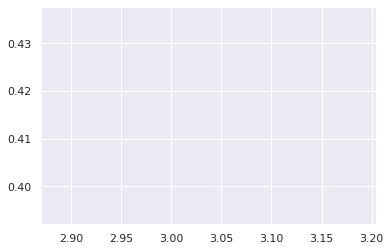

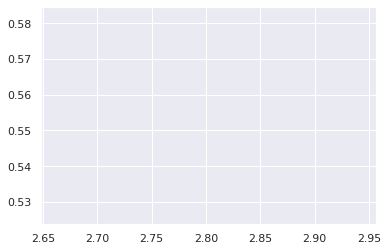

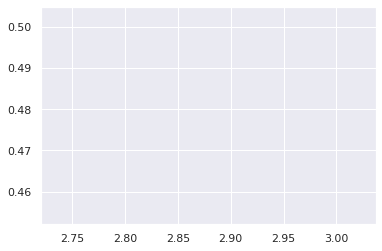

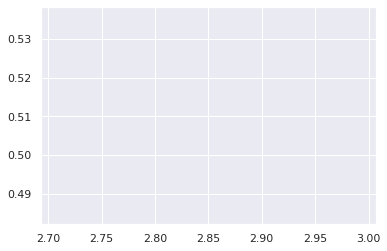

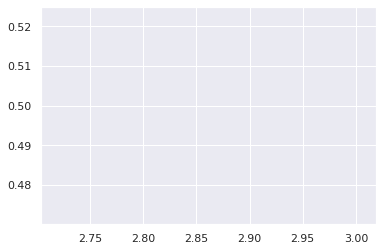

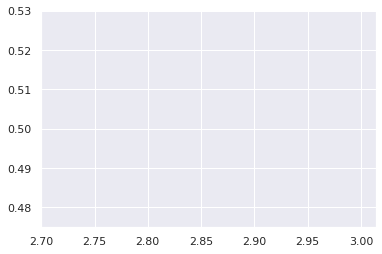

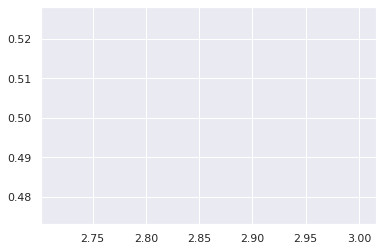

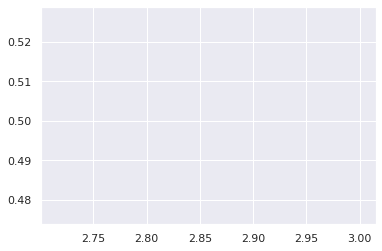

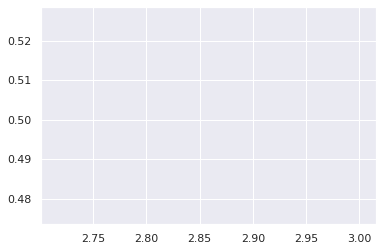

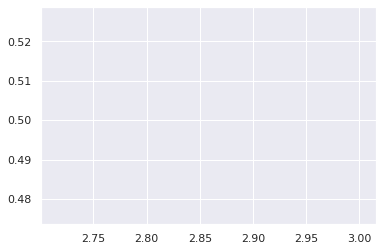

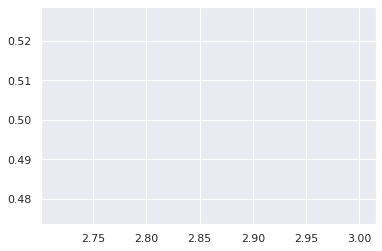

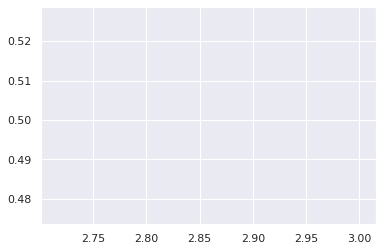

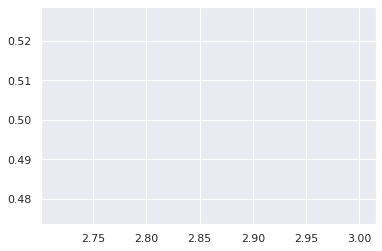

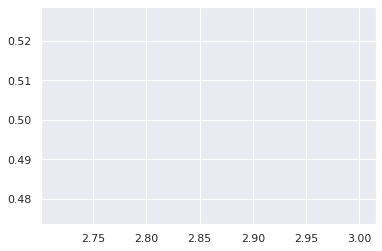

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
A = np.array ( [ [25, 3, -8, 9], [-3, 18, 11, -1], [4, -7, 15, 0], [-1, 1, 0, 3] ], float)
B = np.array([[0],[-2],[7], [9]], float)
[r,c] = A.shape
x_0 =np.array([[0],[0],[0],[0]], float) # 1r solución 
error = np.inf # error de aproximación 
tol = 0.00001
x = np.zeros([c,1], float)
while error > tol:
  for i in range(0,r):
    s_1 = 0 
    for l in range(0,i):
      s_1 += A[i,l] * x[l]  
    s_2 = 0 
    for l in range(i +1, r): 
      s_2 += A[i,l] * x_0[l]

    x[i] = (B[i] - s_1 - s_2) / A[i,i] 
  error = max(abs(x - x_0))
  x_0 =np.copy(x)